In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [ ]:
df = pd.read_csv("/content/bank-marketing (1).csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [ ]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.drop(['contact'], axis = 1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df['targeted'].value_counts()

yes    37091
no      8120
Name: targeted, dtype: int64

In [ ]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:

df['month'].value_counts()



may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [ ]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [ ]:
#Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

'''Here, We can see that around 75% values of pdays are -1. That does not conclude that the previous campaign was made for them or not.
 To get the customers who did have campaign earlier we must remove all the cases of -1.'''

In [ ]:
#Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?
 
df.drop(df[df['pdays'] < 0].index, inplace = True)

In [ ]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

'''Now the numerical data looks normal as we have removed the customers who didn't have campaign earlier.'''


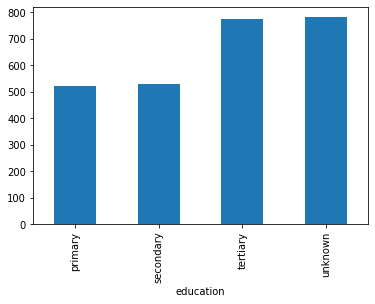

In [ ]:
#Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

plt=df.groupby(['education'])['balance'].median().plot.bar()

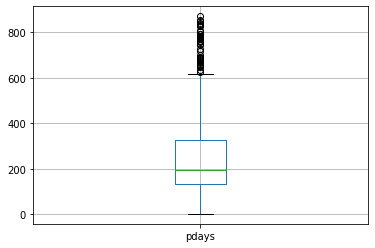

In [ ]:
 # Make a box plot for pdays. Do you see any outliers? 

 df.boxplot('pdays')

In [ ]:
# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”

 # bi-variate analysis.
 

In [ ]:
df['response'].describe()

count     8257
unique       2
top         no
freq      6352
Name: response, dtype: object

In [ ]:
df.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [ ]:
# Convert the response variable to a convenient form.

df.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [ ]:
df.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

In [ ]:
obj = []
num = []
for col in df.columns:
    if df[col].dtype=='O':
        obj.append(col)
    else:
        num.append(col)

In [ ]:
# Make suitable plots for associations with numerical features and categorical features.

print("Object data type features ",obj)
print("Numerical data type features ",num)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


In [ ]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.058322,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280,0.072577
salary,0.058322,1.000000,0.066079,0.002379,0.005734,-0.018559,-0.106134,0.028427,0.036774
balance,0.115480,0.066079,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570,0.076995
day,0.018399,0.002379,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801,0.029952
duration,0.060519,0.005734,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150,0.342610
campaign,0.003842,-0.018559,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523,-0.094110
pdays,-0.107863,-0.106134,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,-0.152206
previous,0.002280,0.028427,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000,0.008622
response,0.072577,0.036774,0.076995,0.029952,0.342610,-0.094110,-0.152206,0.008622,1.000000


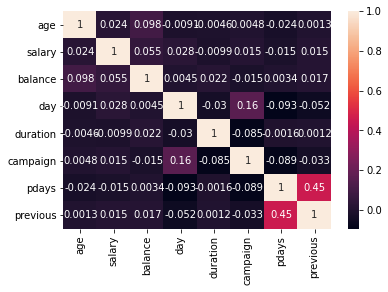

In [ ]:
sns.heatmap(df.corr(),annot=True)

'''We can see that duration variable is highly correlated with response variable'''

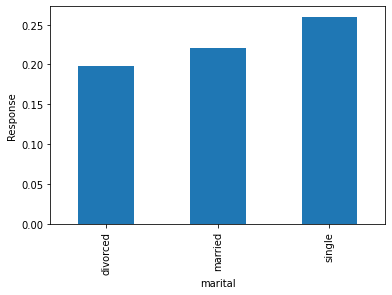

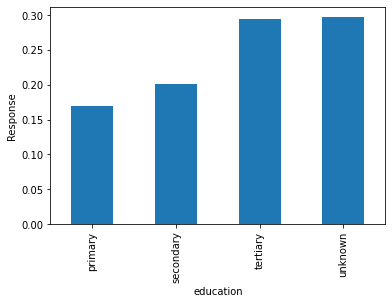

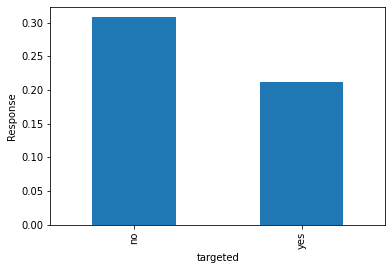

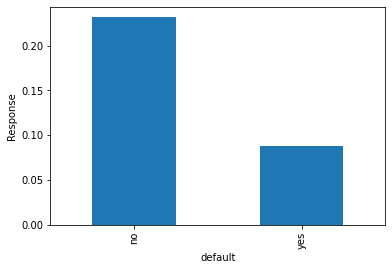

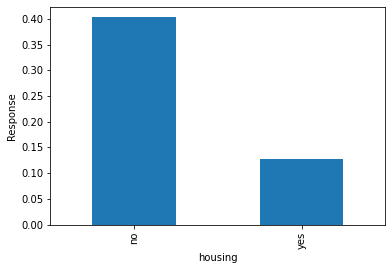

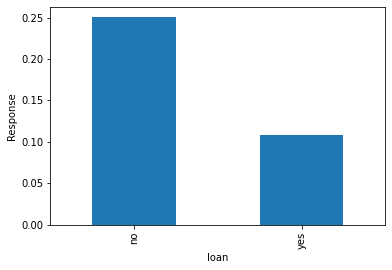

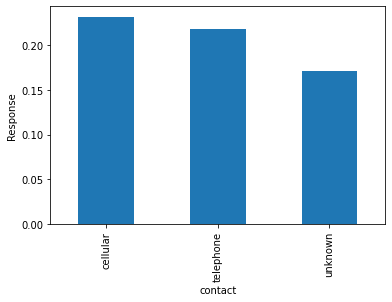

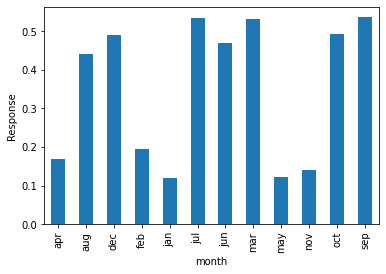

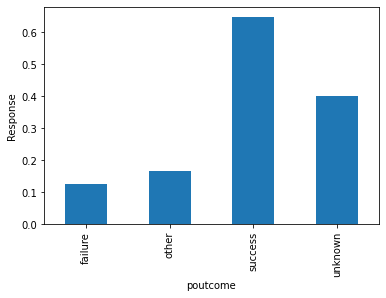

In [ ]:
from numpy import median
for col in obj[1:]:
    plt = df[[col,'response']].groupby(df[col]).mean().plot(kind='bar',legend = False,)
    plt.set(xlabel=col,ylabel='Response')



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = df[obj].apply(LabelEncoder().fit_transform)

In [ ]:
df1.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [ ]:
df2 = df1.join(df[num])
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [ ]:
df2.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


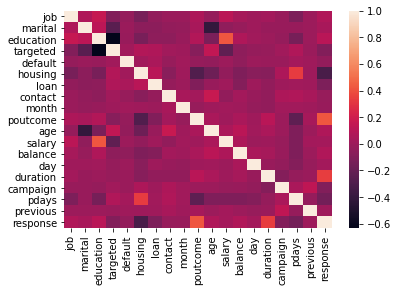

In [ ]:
cols=df2.columns
correlations=df2[cols].corr()
sns.heatmap(correlations)

** Predictive model 1: Logistic regression **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X= df2.drop(["response"],axis=1)
Y=df2.response

In [ ]:

x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.3, random_state = 100)

In [ ]:
lr = LogisticRegression(random_state=1)


In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

cross validation score

In [ ]:
cv_score= cross_val_score(lr,x_train,y_train, cv=5)
np.mean(cv_score)*100

78.40458964334397

prediction

In [ ]:

y_pred = lr.predict(x_test)

In [ ]:

lr.score(x_test,y_test) 

0.7679580306698951

confusion matrix

In [ ]:

confusion_matrix(y_pred,y_test)

array([[1801,  493],
       [  82,  102]])

classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1883
           1       0.55      0.17      0.26       595

    accuracy                           0.77      2478
   macro avg       0.67      0.56      0.56      2478
weighted avg       0.73      0.77      0.72      2478



**Using RFE and fitting it into model** 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [ ]:
X= df2.drop(["response"],axis=1)
Y=df2.response

In [ ]:
lm = LogisticRegression()
lm.fit(x, y)

rfe = RFE(estimator=lm,step=18)                    
rfe = rfe.fit(X,Y)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('job', False, 2),
 ('marital', True, 1),
 ('education', True, 1),
 ('targeted', True, 1),
 ('default', True, 1),
 ('housing', True, 1),
 ('loan', True, 1),
 ('contact', True, 1),
 ('month', False, 4),
 ('poutcome', True, 1),
 ('age', False, 3),
 ('salary', False, 10),
 ('balance', False, 9),
 ('day', False, 7),
 ('duration', False, 5),
 ('campaign', True, 1),
 ('pdays', False, 8),
 ('previous', False, 6)]

In [ ]:
col = x.columns[rfe.support_]
col

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'age', 'salary', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [ ]:
X = x[col]
Y=df2.response

In [ ]:
lr1 = LogisticRegression()

In [ ]:
lr1.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

cross validation score

In [ ]:

cv_score= cross_val_score(lr1,X,Y, cv=5)
np.mean(cv_score)

0.7651706427830811

prediction

In [ ]:
y_pred = lr1.predict(X)


In [ ]:
lr1.score(X,Y) 

0.7810342739493763

confusion matrix

In [ ]:
confusion_matrix(y_pred,Y)


array([[6084, 1540],
       [ 268,  365]])

**classification report**

In [ ]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6352
           1       0.57      0.20      0.30      1905

    accuracy                           0.78      8257
   macro avg       0.69      0.58      0.58      8257
weighted avg       0.75      0.78      0.74      8257



VIF Calculation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_ = X
vif['Features'] = X_.columns
vif['VIF'] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.76
3,targeted,6.49
2,education,6.48
11,salary,5.35
16,pdays,5.29
1,marital,4.39
13,day,4.08
8,month,3.62
5,housing,3.16
0,job,2.87


Feature Importance

The important features for this logistic regression classification are:


    job
    marital
    education
    targeted
    default
    housing
    loan
    contact
    poutcome
    campaign


**Random Forest Classifier **

Train-Test Split

In [ ]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X,Y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
clf=RandomForestClassifier(n_estimators=50,max_depth=9)

cross validation

In [ ]:
cv_score= cross_val_score(clf,x_train1,y_train1, cv=8)
np.mean(cv_score)

0.8497984218572201

In [ ]:
clf.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

prediction

In [ ]:
y_pred1=clf.predict(x_test1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.841000807102502


confusion matrix

In [ ]:
confusion_matrix(y_test1, y_pred1)

array([[1783,  100],
       [ 294,  301]])

classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1883
           1       0.75      0.51      0.60       595

    accuracy                           0.84      2478
   macro avg       0.80      0.73      0.75      2478
weighted avg       0.83      0.84      0.83      2478



## Compare the performance of the Random Forest and the logistic mode

***CONCLUSION**

**After comparing the important features of both Logistic regression and Random Forest. I found that the number of important features are more in Logistic Regression than Random Forest. Although all the important features of Random Forest are the subset of features in Logistic Regression.**

After analyzing all the metrics of both the models. I found that Random Forest is more optimal than Logistic Regression.